# Homework 2

## Yourname

Instructions: 

 1. Please replace "Yourname" above, and in the title of this notebook. 
 2. Import all the libraries you end up using in the cell below. Please only use those libraries which we have used in class (i.e. nltk, collections, pandas, etc.). 
 3. Complete all the exercises, replacing "enter code here" with your code, and "enter markdown here" with your markdown. Annotate with comments (lines beginning with `#`) or with markdown cells, to show how you arrived at your answers.  
 4. From the Kernel menu, select "restart and run all." This will help me to see the output of your answers. 
 5. Email me your completed notebook: jonathan.reeve@columbia.edu


In [2]:
# Import all your libraries here.
import nltk
from nltk.text import Text
from nltk import word_tokenize, sent_tokenize
import pandas as pd
from collections import Counter
%matplotlib inline

### 1. Write a function that takes a text in English (i.e. a string), tokenizes it using `nltk.word_tokenize()`, and returns its type/token ratio. 

In [3]:
def typeTokenRatio(text): 
    textTokens = word_tokenize(text)
    return len(set(textTokens)) / len(textTokens)

### 2. Use your function to calculate the type/token ratios for all the narrators we have read so far (Betteredge, Clack, Bruff, Blake). Then, in a markdown cell, describe what you think this might indicate.

In [5]:
moonstone = open('/home/jon/Code/course-computational-literary-analysis/moonstone.md').read()

In [6]:
moonstoneParts = moonstone.split('%%%%%')

In [15]:
bet = moonstoneParts[1]
clack = moonstoneParts[3]
bruff = moonstoneParts[5]  
blake = moonstoneParts[6]

In [20]:
[len(text) for text in [bet, clack, bruff, blake]]

[430752, 169326, 57208, 236679]

In [22]:
[typeTokenRatio(text[:50000]) for text in [bet, clack, bruff, blake]]

[0.17040716756852656,
 0.20663046584738498,
 0.1836850572537144,
 0.18776658498956347]

Enter markdown here.

### 3. Choose a motif that you notice in _The Moonstone_. Choose around 3-5 words (or tokens, stems, or lemmas) that you think represent this motif. Create a dispersion plot to show the positions of these words in the narrative time of _The Moonstone_ (at least the amount that we've read of it). Then create concordances for a few of these words. Then, in 2-3 paragraphs of well-formatted markdown, describe what this tells you about how the motif operates in the novel. 

In [24]:
moonstoneTokens = word_tokenize(moonstone.lower())
moonstoneText = Text(moonstoneTokens)

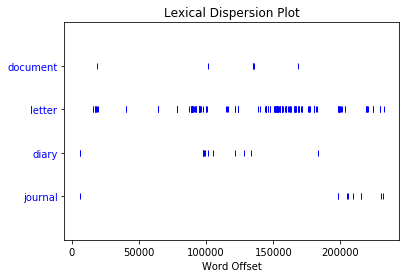

In [27]:
moonstoneText.dispersion_plot(['document', 'letter', 'diary', 'journal'])

In [29]:
moonstoneText.concordance('journal', width=67)

Displaying 10 of 10 matches:
ook and a red face , that her journal is for her own private eye , 
tly as they happened , in the journal habitually kept by mr. candy 
 narrative extracted from the journal of ezra jennings 1849.–june 1
hort entry must suffice in my journal to-day . mr. blake has had th
june last . i have brought my journal here , partly with a view to 
lf in making this entry in my journal . my watch informs me that it
ss of my heart i turned to my journal for relief , and wrote in it 
hat has been presented in the journal of ezra jennings . of myself 
e pages of my poor friend ’ s journal are waiting for you at my hou
. i have not got the ship ’ s journal to refer to , and i can not n


Enter markdown here. 

### 4. Find the distinctive words of Franklin Blake's narrative, as compared with the rest of _The Moonstone_. Then find the distinctive words of Franklin Blake's narrative, as compared with Miss Clack's. In 2-3 paragraphs, discuss these words, and your interpretation of them. Do these words help reveal their personality? Why or why not? And why do you think Franklin and Drusilla don't get along? (Hint: re-read their letters.)

In [30]:
blakeTokens = word_tokenize(blake)
clackTokens = word_tokenize(clack)

In [31]:
blakeCounts = Counter(blakeTokens)
clackCounts = Counter(clackTokens)
moonstoneCounts = Counter(moonstoneTokens)

In [39]:
df = pd.DataFrame([blakeCounts, clackCounts, moonstoneCounts], 
            index=['Blake', 'Clack', 'All']).T

In [40]:
df['BlakeF'] = df['Blake'] / len(blakeTokens)
df['ClackF'] = df['Clack'] / len(clackTokens)
df['AllF'] = df['All'] / len(moonstoneTokens)

In [43]:
df['BlakeVall'] = df['BlakeF'] - df['AllF']
df['BlakeVclack'] = df['BlakeF'] - df['ClackF']

In [46]:
df.sort_values('BlakeVclack', ascending=False)

,Blake,Clack,All,BlakeF,ClackF,AllF,BlakeVall,BlakeVclack
you,789.0,269.0,2435.0,0.015109,0.007421,0.010407,0.004702,0.007688
I,1709.0,943.0,NaN,0.032726,0.026016,NaN,NaN,0.006710
the,2395.0,1477.0,12161.0,0.045863,0.040748,0.051977,-0.006114,0.005115
me,584.0,288.0,1860.0,0.011183,0.007945,0.007950,0.003233,0.003238
Betteredge,121.0,1.0,NaN,0.002317,0.000028,NaN,NaN,0.002289
your,236.0,93.0,707.0,0.004519,0.002566,0.003022,0.001497,0.001954
it,495.0,278.0,2409.0,0.009479,0.007670,0.010296,-0.000817,0.001809
”,780.0,481.0,3057.0,0.014937,0.013270,0.013066,0.001871,0.001666
“,780.0,481.0,3057.0,0.014937,0.013270,0.013066,0.001871,0.001666
at,381.0,209.0,1555.0,0.007296,0.005766,0.006646,0.000650,0.001530


Enter markdown here. 

### 5. Write a program to determine whose name appears in the most number of paragraphs with the words "moonstone" and "diamond." Then, in a markdown cell, describe anything you might notice about your results. 

Here's one way you might do this: 
 - Make a list of all names we've encountered in the novel so far. (Be careful to include both "Rachel" and "Miss Verinder," for instance.)
 - Break the novel into paragraphs by splitting on double line breaks (`\n\n`). 
 - Tokenize each paragraph. 
 - Test for the presence of a word using the `in` keyword for lists. 
 - Maintain a dictionary for each character, where the key is the character's name, and the value is a tally of how many times their name has appeared in the same paragraph as "moonstone" and "diamond." 

In [47]:
moonstoneParas = moonstone.split('\n\n')

In [50]:
len(moonstoneParas)

3687

In [52]:
moonstoneParasT = [word_tokenize(para.lower()) 
                   for para in moonstoneParas]

In [55]:
if "Kiwis" in ["Apples", "Bananas", "Oranges"]: 
    print("Yay kiwis!")
else: 
    print('Nooooooooooooo kiwis!!!')

Nooooooooooooo kiwis!!!


In [60]:
characters = {'Rachel': 0, 'Franklin': 0, 
             'Betteredge': 0, 'Jugglers': 0}
for para in moonstoneParasT: 
    if "moonstone" in para or "diamond" in para: 
        if 'rachel' in para: 
            characters['Rachel'] = characters['Rachel'] + 1 
        if 'franklin' in para: 
            characters['Franklin'] += 1
        if 'betteredge' in para: 
            characters['Betteredge'] += 1
        if 'jugglers' in para or 'indians' in para: 
            characters['Jugglers'] += 1

In [61]:
characters

{'Betteredge': 41, 'Franklin': 80, 'Jugglers': 38, 'Rachel': 64}

Enter markdown here. 

### 6. Write a program to determine the words that occur more often in sentences ending in exclamation marks. In a markdown cell, describe anything you notice in your results. 

Here's one way you might do this: 

 - Sentence-tokenize the novel.
 - Make two empty lists, one for exclamation-mark sentences, and one for other sentences. 
 - Write a `for` loop to go through each sentence, and append it to one of the two lists, depending on whether it contains an exclamation mark.
 - Join the lists together, using `" ".join(list)`, so that they're easier to word-tokenize. 
 - Word-tokenize each string. 
 - Make `Counter()` objects for the resulting list of word-tokens. 
 - Subtract one set of numbers from the other, to find the words that occur much more in one category than another. 
 - Sort the results according to the difference in frequencies between the two.

In [62]:
moonstoneSents = sent_tokenize(moonstone)

In [78]:
containsE = []
noContainsE = []
for sent in moonstoneSents: 
    if '!' in sent: 
        containsE.append(sent)
    else: 
        noContainsE.append(sent)

In [79]:
allE = ' '.join(containsE)
allNoE = ' '.join(noContainsE)

In [80]:
allETokens = word_tokenize(allE)
allNoETokens = word_tokenize(allNoE)

In [81]:
allECounts = Counter(allETokens)
allNoECounts = Counter(allNoETokens)

In [82]:
df = pd.DataFrame([allECounts, allNoECounts], index=['apples', 'oranges']).T

In [83]:
df['!F'] = df['!']/len(allETokens)
df['.F'] = df['.']/len(allNoETokens)

In [85]:
df = df.fillna(0)

In [87]:
df['!-.'] = df['!F'] - df['.F']

In [90]:
df.sort_values('!-.', ascending=False)

,!,.,!F,.F,!-.
!,992.0,0.0,0.045017,0.000000,0.045017
”,602.0,2455.0,0.027319,0.011583,0.015736
“,551.0,2506.0,0.025005,0.011823,0.013181
’,348.0,2198.0,0.015792,0.010370,0.005422
you,266.0,1810.0,0.012071,0.008540,0.003532
t,110.0,524.0,0.004992,0.002472,0.002520
I,594.0,5223.0,0.026956,0.024642,0.002314
Oh,44.0,5.0,0.001997,0.000024,0.001973
said,116.0,729.0,0.005264,0.003439,0.001825
how,44.0,131.0,0.001997,0.000618,0.001379


Enter markdown here. 